In [1]:
import numpy as np, curvedsky as cs, sys, plottools as pl, local, tools_cmbalm, tqdm, tools_lens, quad_func
from pixell import enmap
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
kwargs = {'snmin':0,'snmax':10}
kwargs_ov = {'overwrite':True}
kwargs_qrec = {'n0max':5,'mfmax':10,'qlist':['TT']}

In [3]:
aobj = local.init_analysis_params(qid='diff_dn',**kwargs)
wn = np.ones(5)
tools_lens.interface(aobj,wn,run=['norm','qrec','n0','mean','aps'],kwargs_ov=kwargs_ov,kwargs_qrec=kwargs_qrec)

aps: 100%|████████████████████████████████████████████████████████████| 1/1 [00:46<00:00, 46.17s/it]


In [4]:
dirs = local.data_directory()
tools_lens.interface(aobj,wn,run=['aps'],kwargs_qrec=kwargs_qrec)

aps: 100%|████████████████████████████████████████████████████████████| 1/1 [00:45<00:00, 45.47s/it]


In [5]:
dirs = local.data_directory()
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,**kwargs_qrec)

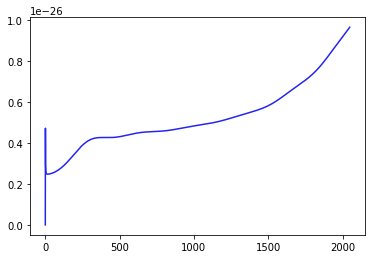

In [6]:
l, al = np.loadtxt(qobj.f['TT'].al,unpack=True,usecols=(0,1))
plot(l,al)

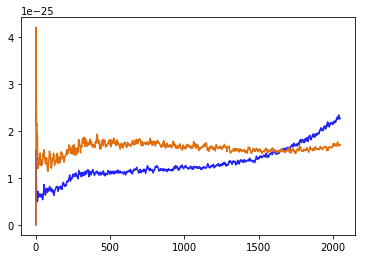

In [19]:
l, n0g, n0c = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1,2))
plot(l,n0g)
plot(l,n0c)

In [12]:
l, gl, cl, xl = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1,2,3))

In [21]:
l, Gl, Cl, Xl = np.loadtxt(qobj.f['TT'].cl[0],unpack=True,usecols=(0,1,2,3))

In [22]:
l, ml = np.loadtxt(qobj.f['TT'].ml[0],unpack=True,usecols=(0,1))

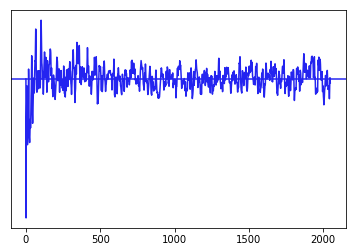

In [34]:
#ylim(-5e-26,5e-26)
#plot(l,gl-n0g*1.1)
yticks([])
#plot(l,xl*l**2*1e-9)
plot(l,Gl-gl)
#plot(l,xl)
axhline(0)